<a href="https://colab.research.google.com/github/Nicogs43/KNN_coverage_constraint_query/blob/master/Analysis_df_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import re
import io
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (25,10)

Fare una parte di analisi solo con dati per ogni df e una parte invece di grafici e inserire commenti su il perchè si evidenzano certe tendenze e certi valori e cercare di capire perchè ci sono le differenze 

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
uploaded = files.upload()
uploaded_1 = files.upload()
uploaded_2 = files.upload()
rewriting_df = pd.read_csv(io.BytesIO(uploaded['test_result_1.csv']))
execution_res_df = pd.read_csv(io.BytesIO(uploaded_1['test_result_exec_1.csv']))
execution_Qind_df = pd.read_csv(io.BytesIO(uploaded_2['test_Qind_exec_1.csv']))

Saving test_result_1.csv to test_result_1.csv


Saving test_result_exec_1.csv to test_result_exec_1.csv


Saving test_Qind_exec_1.csv to test_Qind_exec_1.csv


In [ ]:
def manage_column_with_long_value_two(series):
  series = series.map(lambda x: x.strip('[]'))
  res = []
  for i, v in series.items():
    if(',' in v):
      temp = v.split(',')
      res.append(float(temp[0]))
      res.append(float(temp[1]))
      continue
    res.append(float(v))
  return np.array(res)

# DataFrame: Rewriting

In [ ]:
rewriting_df

,id,query,path,Coverage Constraint,card_true_tot_Q,card_true_sa_Q,card_true_tot_newQ,card_true_sa_newQ,proximity_qcut,relaxation_degree,disparity_index,fairness_index,qcut_average_time_preprocessing,qcut_average_time_pruning,qcut_average_time_algo,qcut_mean_summed_time
0,1,SELECT * FROM adult_data WHERE education_num >...,C:\Users\Nicolò\Desktop\Tesi\res2 - rewrintin...,100,2026,[50],3409,[134],0.036262,0.682626,[0.0393077148723966],[0.01561238680965479],0.004273,0.038841,0.018018,0.061132
1,2,SELECT * FROM adult_data WHERE education_num >...,C:\Users\Nicolò\Desktop\Tesi\res2 - rewrintin...,120,234,[111],318,[132],0.160375,0.358974,[0.41509433962264153],[-0.19276160503540518],0.006700,0.064018,0.047800,0.118518
2,3,SELECT * FROM adult_data WHERE capital_loss < ...,C:\Users\Nicolò\Desktop\Tesi\res2 - rewrintin...,500,6360,[401],8514,[608],0.035070,0.338679,[0.0714117923420249],[0.009610447510726289],0.006157,0.081321,0.355778,0.443255
3,4,SELECT * FROM adult_data WHERE capital_loss < ...,C:\Users\Nicolò\Desktop\Tesi\res2 - rewrintin...,300,6360,"[217, 62]",9956,"[311, 97]",0.214580,0.565409,"[0.031237444756930494, 0.009742868621936521]","[-0.003080073523312153, -5.669008922922977e-06]",0.006262,0.109850,1.576771,1.692883
4,5,SELECT * FROM adult_data WHERE age <= 40 AND e...,C:\Users\Nicolò\Desktop\Tesi\res2 - rewrintin...,80,623,[43],1368,[78],0.170000,1.195827,[0.05701754385964912],[-0.013672814755412988],0.008297,0.062841,1.596899,1.668037
5,6,SELECT * FROM adult_data WHERE education_num <...,C:\Users\Nicolò\Desktop\Tesi\res2 - rewrintin...,900,26504,[665],32431,[1007],0.353553,0.223627,[0.031050538065431222],[0.006309280160659587],0.003923,0.075006,0.020953,0.099881
6,7,SELECT * FROM adult_data WHERE education_num <...,C:\Users\Nicolò\Desktop\Tesi\res2 - rewrintin...,1600,26504,[1423],32431,[1876],0.353553,0.223627,[0.05784588819339521],[0.004661305160512469],0.003849,0.074815,0.020282,0.098947
7,8,SELECT * FROM adult_data WHERE capital_loss < ...,C:\Users\Nicolò\Desktop\Tesi\res2 - rewrintin...,1600,30962,[1496],34825,[1705],0.077069,0.124766,[0.04895908111988514],[0.0007090891786849379],0.006399,0.166624,0.687558,0.860581
8,9,SELECT * FROM adult_data WHERE age <= 40 AND e...,C:\Users\Nicolò\Desktop\Tesi\res2 - rewrintin...,500,16842,[416],18483,[448],0.023521,0.097435,[0.024238489422712763],[-0.00048511540748772883],0.008132,0.078596,0.284706,0.371434
9,10,SELECT * FROM adult_data WHERE education_num >...,C:\Users\Nicolò\Desktop\Tesi\res2 - rewrintin...,400,2026,[378],3409,[812],0.036262,0.682626,[0.23819301848049282],[0.08329953157302489],0.004236,0.039457,0.017990,0.061683


In [ ]:
manage_column_with_long_value_two(execution_res_df['average_time_norm_data_and_comp_q']).std()#fare i calcoli per tutte quelle colonne che hanno un elemento lungo 2

0.04724930765869274

In [ ]:
rewriting_df.agg(
    {
        "card_true_tot_newQ": ["min", "max", "median", "mean","std"],
        "proximity_qcut": ["min", "max", "median", "mean","std"],
        "relaxation_degree": ["min", "max", "median", "mean","std"],
        "qcut_average_time_preprocessing": ["min", "max", "median", "mean"],
        "qcut_average_time_pruning": ["min", "max", "median", "mean"],
        "qcut_average_time_algo": ["min", "max", "median", "mean"],
        "qcut_mean_summed_time": ["min", "max", "median", "mean","std"]
    }
)

,card_true_tot_newQ,proximity_qcut,relaxation_degree,qcut_average_time_preprocessing,qcut_average_time_pruning,qcut_average_time_algo,qcut_mean_summed_time
min,318.000000,0.023521,0.097435,0.003849,0.038478,0.017990,0.061132
max,34825.000000,0.580180,1.934189,0.008297,0.166624,4.296425,4.342939
median,3409.000000,0.123768,0.462192,0.006693,0.074911,0.177628,0.254509
mean,10531.750000,0.182498,0.645829,0.006512,0.075330,0.653582,0.735424
std,12732.504831,0.176987,0.586794,NaN,NaN,NaN,1.107508


In [ ]:
pd.set_option("max_colwidth", None)

# DataFrame: Execution 

In [ ]:
execution_res_df

,id,query,path,Coverage Constraint,card_true_tot_Q,card_true_sa_Q,card_true_tot_newQ,card_true_sa_newQ,relaxation_degree,disparity_index,fairness_index,average_time_read_table,average_time_norm_data_and_comp_q,average_time_norm_data,average_time_q_comp,average_time_norm_point,average_time_tree_exec,average_time_execution
0,1,SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 40,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q1_norm.csv,"[{'AS': ['race'], 'value': ['Black'], 'num': '100'}]",2026,[50],2076,[100],0.024679,[0.04816955684007707],[0.025303643724696356],0.199104,0.03645443916320801,0.017531371116638182,0.000006,0.000014,0.004542779922485351,0.050508
1,2,SELECT * FROM adult_data WHERE education_num >= 14 AND age < 30 AND hours_per_week <= 45,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q2_norm.csv,"[{'AS': ['sex'], 'value': ['Female'], 'num': '120'}]",234,[111],243,[120],0.038462,[0.49382716049382713],[0.07317073170731703],0.191635,0.1166724443435669,0.09062497615814209,0.000006,0.000016,0.017288351058959962,0.142554
2,3,SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 55 AND hours_per_week < 35,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q3_norm.csv,"[{'AS': ['sex', 'race'], 'value': ['Female', 'Black'], 'num': '500'}]",6360,[401],6459,[500],0.015566,[0.07741136398823348],[0.016613525759355596],0.193152,0.03059844970703125,0.010845088958740234,0.000007,0.000017,0.002292966842651367,0.046195
3,4,SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 55 AND hours_per_week < 35,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q4_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '300'}, {'AS': ['race'], 'value': ['Amer-Indian-Eskimo'], 'num': '100'}]",6360,"[217, 62]",6481,"[300, 100]",0.019025,"[0.046289152908501774, 0.015429717636167259]","[0.013211075735998452, 0.005827129793320507]",0.198267,"[0.025095486640930177, 0.020028448104858397]","[0.007382416725158691, 0.002557039260864258]",0.000006,0.000017,"[0.0012461423873901367, 0.00037550926208496094]",0.062117
4,5,SELECT * FROM adult_data WHERE age <= 40 AND education_num >= 13 AND hours_per_week > 30 AND capital_gain > 500,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q5_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '80'}]",623,[43],660,[80],0.059390,[0.12121212121212122],[0.06379310344827586],0.192491,0.029567885398864745,0.011144185066223144,0.000007,0.000017,0.0007787942886352539,0.039594
5,6,SELECT * FROM adult_data WHERE education_num < 12 AND hours_per_week <= 40,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q6_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '900'}]",26504,[665],26739,[900],0.008867,[0.03365870077415012],[0.00909477920972174],0.198532,0.0127593994140625,0.003258013725280762,0.000007,0.000016,0.0004756689071655273,0.043969
6,7,SELECT * FROM adult_data WHERE education_num < 12 AND hours_per_week <= 40,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q7_norm.csv,"[{'AS': ['sex', 'marital_status'], 'value': ['Female', 'Married-civ-spouse'], 'num': '1600'}]",26504,[1423],26681,[1600],0.006678,[0.05996776732506278],[0.007057134882979148],0.197582,0.01488947868347168,0.003937745094299316,0.000006,0.000016,0.000465703010559082,0.049089
7,8,SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 50 AND hours_per_week > 30,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q8_norm.csv,"[{'AS': ['sex', 'race'], 'value': ['Female', 'Black'], 'num': '1600'}]",30962,[1496],31066,[1600],0.003359,[0.051503251142728385],[0.0035294916174574073],0.192651,0.014049339294433593,0.0045842409133911135,0.000007,0.000019,0.000611567497253418,0.054608
8,9,SELECT * FROM adult_data WHERE age <= 40 AND education_num < 13 AND hours_per_week > 30 AND capital_gain < 500,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q9_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '500'}]",1

In [ ]:
manage_column_with_long_value_two(execution_res_df['disparity_index']).std()
manage_column_with_long_value_two(execution_res_df['disparity_index']).mean()
manage_column_with_long_value_two(execution_res_df['disparity_index'])

array([0.04816956, 0.49382716, 0.07741136, 0.04628915, 0.01542972,
       0.12121212, 0.0336587 , 0.05996777, 0.05150325, 0.02954035,
       0.1953125 , 0.08264463, 0.61919505, 0.30120482, 0.5186722 ,
       0.11904762, 0.34096721])

In [ ]:
execution_res_df.agg({
    "card_true_tot_newQ": ["min", "max", "median", "mean","std"],
    "relaxation_degree": ["min", "max", "median", "mean","std"],
    "average_time_read_table": ["min", "max", "median", "mean","std"],
    "average_time_norm_point": ["min", "max", "median", "mean","std"],
    "average_time_execution": ["min", "max", "median", "mean","std"],
})
# la funzione mean di pandas è meno accurata di quella di numpy però solo nei casi di numeri molto grandi o molto precisi 

,card_true_tot_newQ,relaxation_degree,average_time_read_table,average_time_norm_point,average_time_execution
min,242.000000,0.003359,0.191635,0.000014,0.039594
max,31066.000000,0.547352,0.206906,0.000020,0.195373
median,2062.000000,0.029434,0.197924,0.000017,0.060942
mean,8740.062500,0.083940,0.196719,0.000017,0.090937
std,11137.254249,0.153125,0.004222,0.000002,0.055619


# Confronto fra gli approcci Rewriting ed Execution

[]

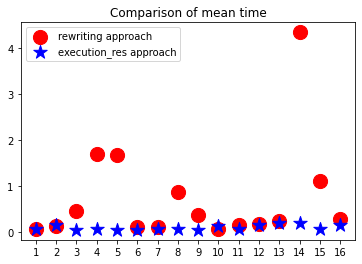

In [ ]:

plt.scatter(rewriting_df['id'],rewriting_df['qcut_mean_summed_time'],color='red',label ='rewriting approach',s=200)
plt.scatter(execution_res_df['id'],execution_res_df['average_time_execution'],color='blue',label='execution_res approach',s=200,marker='*')
plt.xticks(rewriting_df['id'])
plt.title("Comparison of mean time")
plt.legend(loc = 'upper left')
plt.plot()


*   The **relaxation degree**, quantifies how much 𝑄𝑜𝑝𝑡
𝑆,𝐶𝐶 relaxes the input query 𝑄, as the percentage of new tuples returned by
𝑄𝑜𝑝𝑡
𝑆,𝐶𝐶 with respect to those contained in the input query result. The lower the relaxation
degree, the lower is the applied relaxation.
*   **Fairness index**. For each coverage constraint 𝐶, this measure computes the difference in the
distribution of protected and unprotected groups in the result of the input query and the
rewritten one. Information about the distribution can be obtained by computing the fairness
rate 𝑓 () of the instances satisfying the constraints and those do not satisfying it. Statistical
parity is achieved by a query result for fairness rate values close to 1. Values of the fairness
index are between 1 and -1: values close to 1 means that the AOR improves statistical parity.
*   **Disparity index** is the ratio between the value of the cardinality of the protected group and the value of the cardinality of the rewritten query




[]

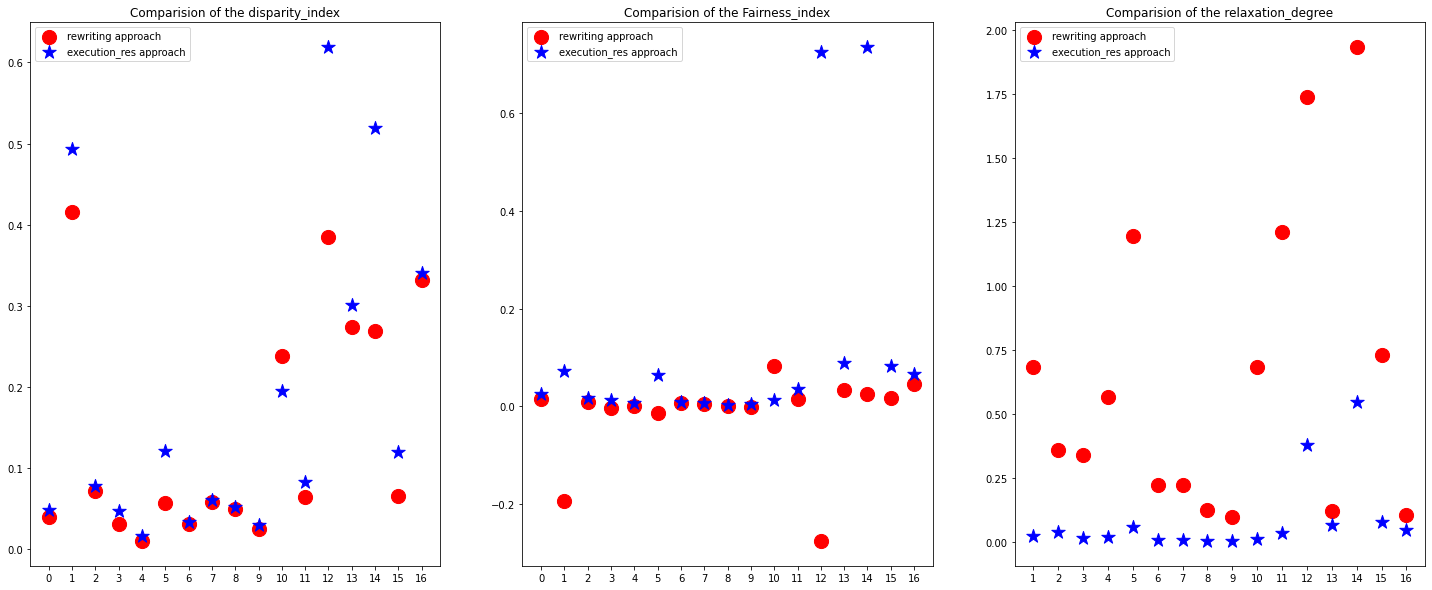

In [ ]:
plt.subplot(1, 3, 1)
plt.scatter(range(len(manage_column_with_long_value_two(rewriting_df['disparity_index']))),
            manage_column_with_long_value_two(rewriting_df['disparity_index']),color='red',label ='rewriting approach',s=200)
plt.scatter(range(len(manage_column_with_long_value_two(rewriting_df['disparity_index']))),
            manage_column_with_long_value_two(execution_res_df['disparity_index']),color='blue',label='execution_res approach',s=200,marker='*')
plt.xticks(range(len(manage_column_with_long_value_two(rewriting_df['disparity_index']))))
plt.title("Comparision of the disparity_index")
plt.legend(loc = 'upper left')
plt.plot()

test1_rew = manage_column_with_long_value_two(rewriting_df['fairness_index'])

plt.subplot(1, 3, 2)
plt.scatter(range(len(test1_rew)),manage_column_with_long_value_two(rewriting_df['fairness_index']),
            color='red',label ='rewriting approach',s=200)
plt.scatter(range(len(test1_rew)),manage_column_with_long_value_two(execution_res_df['fairness_index']),
            color='blue',label='execution_res approach',s=200,marker='*')
plt.xticks(range(len(test1_rew)))
plt.title("Comparision of the Fairness_index")
plt.legend(loc = 'upper left')
plt.plot()

plt.subplot(1,3,3)
plt.scatter(rewriting_df['id'],rewriting_df['relaxation_degree'],
            color='red',label ='rewriting approach',s=200)
plt.scatter(rewriting_df['id'],execution_res_df['relaxation_degree'],
            color='blue',label='execution_res approach',s=200,marker='*')
plt.xticks(range(len(test1_rew)))
plt.title("Comparision of the relaxation_degree")
plt.legend(loc = 'upper left')
plt.plot()

In [ ]:
fairness_test = np.where(manage_column_with_long_value_two(rewriting_df['fairness_index'])<manage_column_with_long_value_two(execution_res_df['fairness_index']),True , False)
fairness_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True])

In [ ]:
rewriting_df[rewriting_df['id']==10]

,id,query,path,Coverage Constraint,card_true_tot_Q,card_true_sa_Q,card_true_tot_newQ,card_true_sa_newQ,proximity_qcut,relaxation_degree,disparity_index,fairness_index,qcut_average_time_preprocessing,qcut_average_time_pruning,qcut_average_time_algo,qcut_mean_summed_time
9,10,SELECT * FROM adult_data WHERE education_num >...,C:\Users\Nicolò\Desktop\Tesi\res2 - rewrintin...,400,2026,[378],3409,[812],0.036262,0.682626,[0.23819301848049282],[0.08329953157302489],0.004236,0.039457,0.01799,0.061683


In [ ]:
print(np.where(manage_column_with_long_value_two(rewriting_df['disparity_index'])<manage_column_with_long_value_two(execution_res_df['disparity_index']),True,False))
#sempre la query 10 sarà un caso fortutito(manca la query 2 in realà)

[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True]


Pare che con l'approccio rewriting si rilassino di più la query per il risultato, probabilmente perchè questo approccio non si limita a trovare strettamente quei valori che mancano per raggiunger il vaolre del CC.
L'indice di fairness nel caso rewriting invece è più basso rispetto a quello di execution mostrando come la parità statistica tra il gruppo protetto e quello non protetto è migliore con l'approccio execution.

Si nota come il tempo medio di esecuzione sia migliore, nel senso più veloce, nell'approccio execution_res rispetto all'approccio rewriting.
Solo in due casi, quanto detto poco sopra, viene smentito. In corrispondenza della seconda query (SELECT * FROM adult_data WHERE education_num >= 14 AND age < 30 AND hours_per_week <= 45) e nella decima(SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 40). Questo comportamento potrebbe essere figlio del fatto che il kdtree è più performante quando non deve agire su numeri grandi di dati(o osservazioni, il numero di dimensioni o features, che sia grandi o piccole non influenzano molto la performance dell'algoritmo) in questo caso i nuovi elementi da trovare per raggiungere il CC dato che già con la query di input si ha un buon numero di elementi del gruppo protetto.

Controllare la distribuzione come ha detto la stefania 

[What is a Good Nearest Neighbors Algorithm
for Finding Similar Patches in Images?
](https://www1.cs.columbia.edu/CAVE/publications/pdfs/Kumar_ECCV08_2.pdf)

[Tree algorithms explained: Ball Tree Algorithm vs. KD Tree vs. Brute Force](https://towardsdatascience.com/tree-algorithms-explained-ball-tree-algorithm-vs-kd-tree-vs-brute-force-9746debcd940)

# DataFrame: Execution Qind

In [ ]:
execution_Qind_df

,id,Qind,path,Coverage Constraint,card_true_tot_Q,card_true_sa_Q,card_true_tot_Qind,card_true_sa_Qind,relaxation_degree_Qind,disparity_index_Qind,fairness_index_Qind,proximity_Qind,average_time_exec_Qind
0,1,SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 39,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q1_norm.csv,"[{'AS': ['race'], 'value': ['Black'], 'num': '100'}]",2026,[50],3403,[134],0.679664,[0.015687485060864977],[0.03937702027622686],0.025641,0.000300
1,2,SELECT * FROM adult_data WHERE education_num >= 14 AND age < 33 AND hours_per_week <= 46,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q2_norm.csv,"[{'AS': ['sex'], 'value': ['Female'], 'num': '120'}]",234,[111],388,[169],0.658120,[-0.13074952667334894],[0.43556701030927836],0.053319,0.000322
2,3,SELECT * FROM adult_data WHERE capital_loss < 2340 AND age < 69 AND hours_per_week < 51,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q3_norm.csv,"[{'AS': ['sex', 'race'], 'value': ['Female', 'Black'], 'num': '500'}]",6360,[401],42177,[2193],5.631604,[-0.012446231219455393],[0.05199516324062878],0.555882,0.000343
3,4,SELECT * FROM adult_data WHERE capital_loss < 1591 AND age < 60 AND hours_per_week < 44,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q4_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '300'}, {'AS': ['race'], 'value': ['Amer-Indian-Eskimo'], 'num': '100'}]",6360,"[217, 62]",30785,"[1060, 347]",3.840409,"[0.0003354587818473337, 0.0015558283589079697]","[0.03443235341887283, 0.011271723241838557]",0.202975,0.000338
4,5,SELECT * FROM adult_data WHERE age <= 46 AND education_num >= 12 AND hours_per_week > 23 AND capital_gain > 0,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q5_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '80'}]",623,[43],1070,[56],0.717496,[-0.018911106576889068],[0.052336448598130844],1.039042,0.000535
5,6,SELECT * FROM adult_data WHERE education_num < 14 AND hours_per_week <= 40,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q6_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '900'}]",26504,[665],32431,[1007],0.223627,[0.006309280160659587],[0.031050538065431222],0.500000,0.000323
6,7,SELECT * FROM adult_data WHERE education_num < 14 AND hours_per_week <= 40,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q7_norm.csv,"[{'AS': ['sex', 'marital_status'], 'value': ['Female', 'Married-civ-spouse'], 'num': '1600'}]",26504,[1423],32431,[1876],0.223627,[0.004661305160512469],[0.05784588819339521],0.500000,0.000314
7,8,SELECT * FROM adult_data WHERE capital_loss < 1905 AND age < 69 AND hours_per_week > 19,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q8_norm.csv,"[{'AS': ['sex', 'race'], 'value': ['Female', 'Black'], 'num': '1600'}]",30962,[1496],44712,[2166],0.444093,[0.00013922430268031166],[0.04844337090713902],0.624188,0.000475
8,9,SELECT * FROM adult_data WHERE age <= 46 AND education_num < 15 AND hours_per_week > 23 AND capital_gain < 7689,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q9_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '500'}]",16842,[416],30942,[965],0.837193,[0.006865643545598925],[0.03118738284532351],0.722723,0.000524
9,10,SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 39,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q10_norm.csv,"[{'AS': ['sex'], 'value': ['Female'], 'num': '400'}]",2026,[378],3403,[808],0.679664,[0.08199908337542322],[0.23743755509844255],0.025641,0.000302


In [ ]:
print('Devianza standard per la misura fairness:',manage_column_with_long_value_two(execution_Qind_df['fairness_index_Qind']).std())
print('Devianza standard per la misura disparity:',manage_column_with_long_value_two(execution_Qind_df['disparity_index_Qind']).std())
print('Devianza standard per la misura relaxation_degree:', execution_Qind_df['relaxation_degree_Qind'].std())

Devianza standard per la misura fairness: 0.1397953771216834
Devianza standard per la misura disparity: 0.06963617622151458
Devianza standard per la misura relaxation_degree: 3.8889443619515673


In [ ]:
execution_Qind_df.agg({
    "card_true_tot_Qind": ["min", "max", "median", "mean","std"],
    "relaxation_degree_Qind": ["min", "max", "median", "mean","std"],
    "proximity_Qind": ["min", "max", "median", "mean","std"],
    "average_time_exec_Qind": ["min", "max", "median", "mean","std"],
})

,card_true_tot_Qind,relaxation_degree_Qind,proximity_Qind,average_time_exec_Qind
min,388.000000,0.223627,0.025641,0.000300
max,44712.000000,15.670940,1.084629,0.000678
median,3652.000000,0.711075,0.527941,0.000341
mean,16519.687500,2.147606,0.528131,0.000424
std,17676.043681,3.888944,0.392745,0.000126


# Confronto fra gli approcci Execution e Execution(Qind)

[]

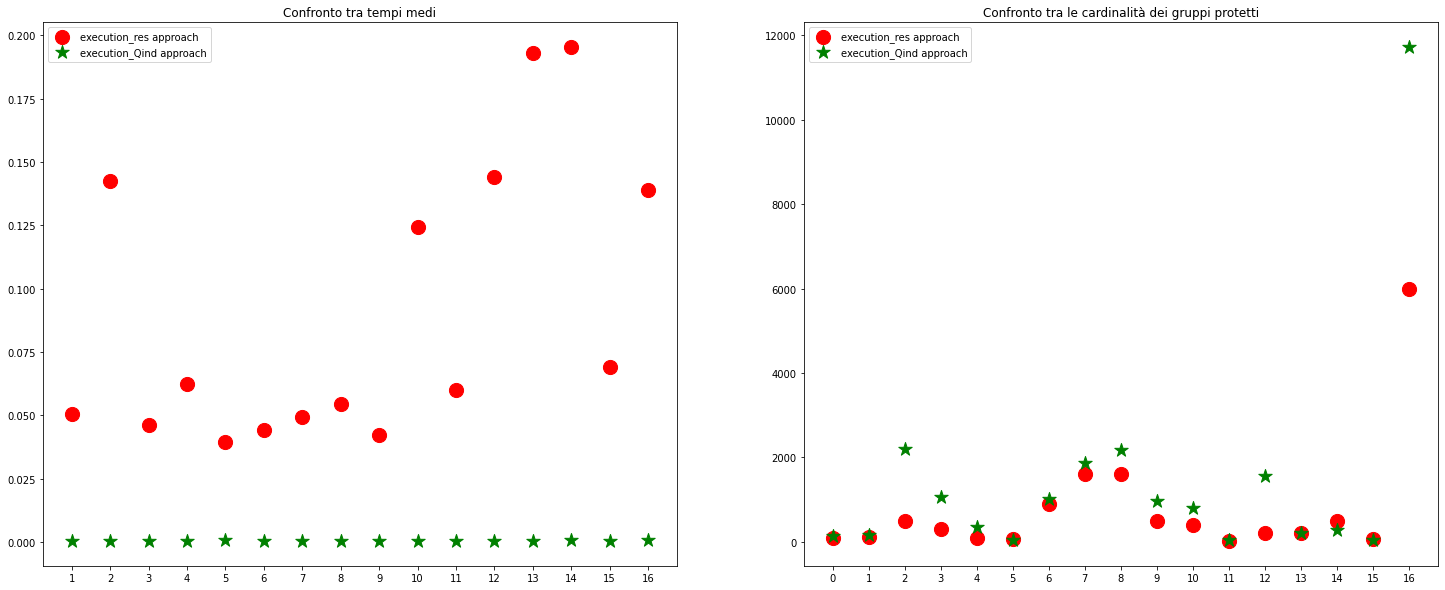

In [ ]:
plt.subplot(1,2,1)
plt.scatter(execution_res_df['id'],execution_res_df['average_time_execution'],color='red',label ='execution_res approach',s=200)
plt.scatter(execution_Qind_df['id'],execution_Qind_df['average_time_exec_Qind'],color='green',label='execution_Qind approach',s=200,marker='*')
plt.xticks(execution_res_df['id'])
plt.title("Confronto tra tempi medi")
plt.legend(loc = 'upper left')
plt.plot()
plt.subplot(1,2,2)
test2_exec_qind = manage_column_with_long_value_two(execution_Qind_df['card_true_sa_Qind'])
plt.scatter(range(len(test2_exec_qind)),manage_column_with_long_value_two(execution_res_df['card_true_sa_newQ']),color='red',label ='execution_res approach',s=200)
plt.scatter(range(len(test2_exec_qind)),manage_column_with_long_value_two(execution_Qind_df['card_true_sa_Qind']),color='green',label='execution_Qind approach',s=200,marker='*')
plt.title("Confronto tra le cardinalità dei gruppi protetti")
plt.xticks(range(len(test2_exec_qind)))
plt.legend(loc = 'upper left')
plt.plot()


Si nota che i tempi nel caso della Query indotta, come pronosticabile, sono molto inferiori a quelli dell execution normale. Dall'altra parte i valori della cardinalità del gruppo protetto sono un poco,in linea generale, superiori nel caso della query indotta

[]

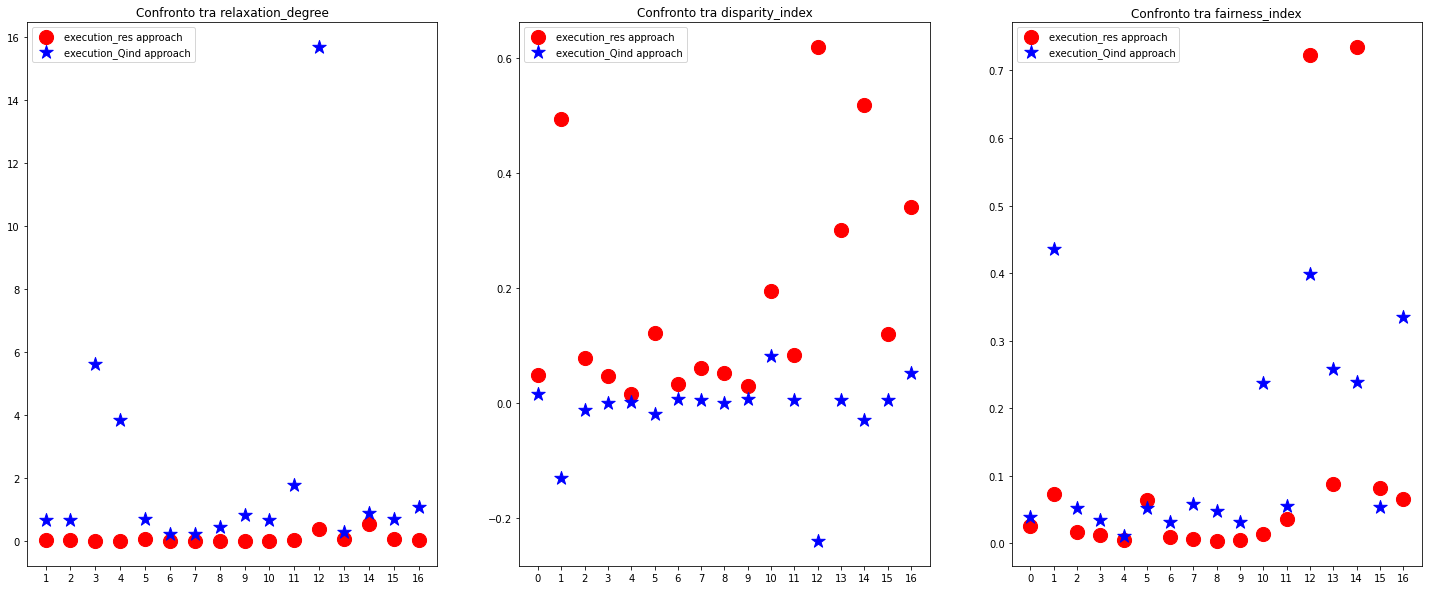

In [ ]:
plt.subplot(1,3,1)
plt.scatter(execution_res_df['id'],execution_res_df['relaxation_degree'],color='red',label ='execution_res approach',s=200)
plt.scatter(execution_Qind_df['id'],execution_Qind_df['relaxation_degree_Qind'],color='blue',label='execution_Qind approach',s=200,marker='*')
plt.xticks(execution_res_df['id'])
plt.title("Confronto tra relaxation_degree")
plt.legend(loc = 'upper left')
plt.plot()
plt.subplot(1,3,2)
plt.scatter(range(len(test2_exec_qind)),manage_column_with_long_value_two(execution_res_df['disparity_index']),color='red',label ='execution_res approach',s=200)
plt.scatter(range(len(test2_exec_qind)),manage_column_with_long_value_two(execution_Qind_df['disparity_index_Qind']),color='blue',label='execution_Qind approach',s=200,marker='*')
plt.title("Confronto tra disparity_index")
plt.xticks(range(len(test2_exec_qind)))
plt.legend(loc = 'upper left')
plt.plot()
plt.subplot(1,3,3)
plt.scatter(range(len(test2_exec_qind)),manage_column_with_long_value_two(execution_res_df['fairness_index']),color='red',label ='execution_res approach',s=200)
plt.scatter(range(len(test2_exec_qind)),manage_column_with_long_value_two(execution_Qind_df['fairness_index_Qind']),color='blue',label='execution_Qind approach',s=200,marker='*')
plt.title("Confronto tra fairness_index")
plt.xticks(range(len(test2_exec_qind)))
plt.legend(loc = 'upper left')
plt.plot()

# Confronto tra Execution Qind e Rewriting 

[]

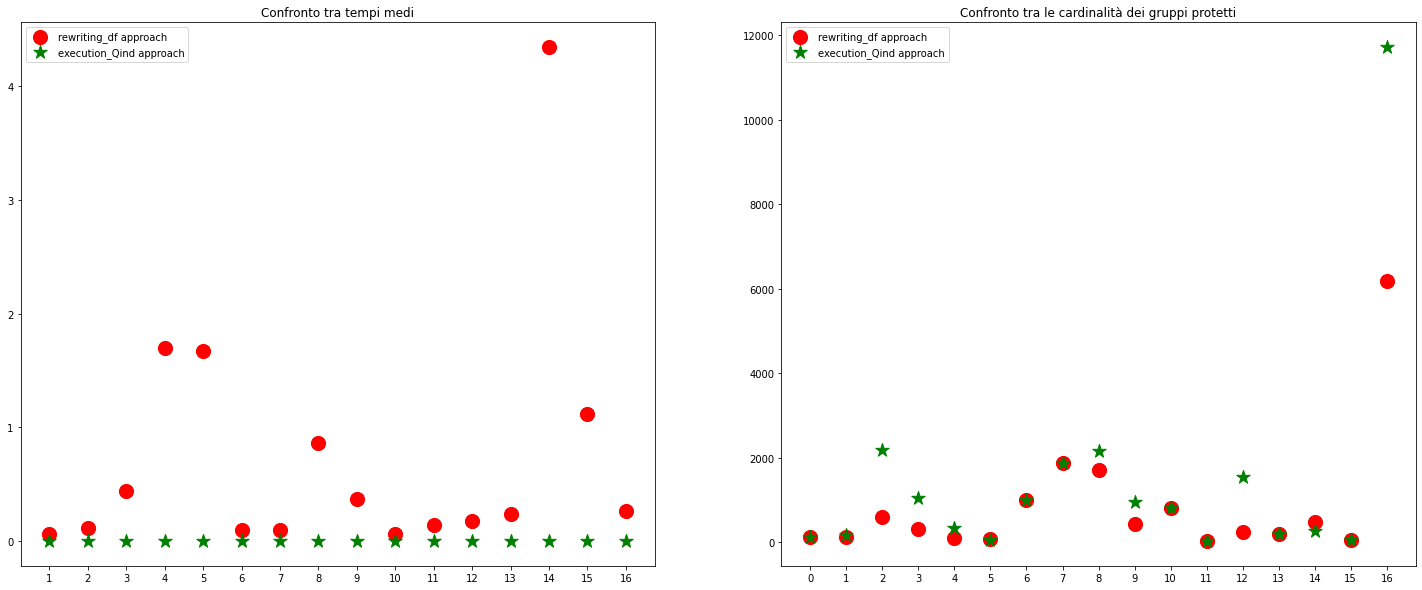

In [ ]:
plt.subplot(1,2,1)
plt.scatter(rewriting_df['id'],rewriting_df['qcut_mean_summed_time'],color='red',label ='rewriting_df approach',s=200)
plt.scatter(execution_Qind_df['id'],execution_Qind_df['average_time_exec_Qind'],color='green',label='execution_Qind approach',s=200,marker='*')
plt.xticks(execution_Qind_df['id'])
plt.title("Confronto tra tempi medi")
plt.legend(loc = 'upper left')
plt.plot()
plt.subplot(1,2,2)
test2_exec_qind = manage_column_with_long_value_two(execution_Qind_df['card_true_sa_Qind'])
plt.scatter(range(len(test2_exec_qind)),manage_column_with_long_value_two(rewriting_df['card_true_sa_newQ']),color='red',label ='rewriting_df approach',s=200)
plt.scatter(range(len(test2_exec_qind)),manage_column_with_long_value_two(execution_Qind_df['card_true_sa_Qind']),color='green',label='execution_Qind approach',s=200,marker='*')
plt.title("Confronto tra le cardinalità dei gruppi protetti")
plt.xticks(range(len(test2_exec_qind)))
plt.legend(loc = 'upper left')
plt.plot()

Anche in questo caso il tempo medio per Query è sempre minore nel caso della Query indotta e le cardinalità del gruppo protetto sono più simili che nel confronto fatto subito prima.

[]

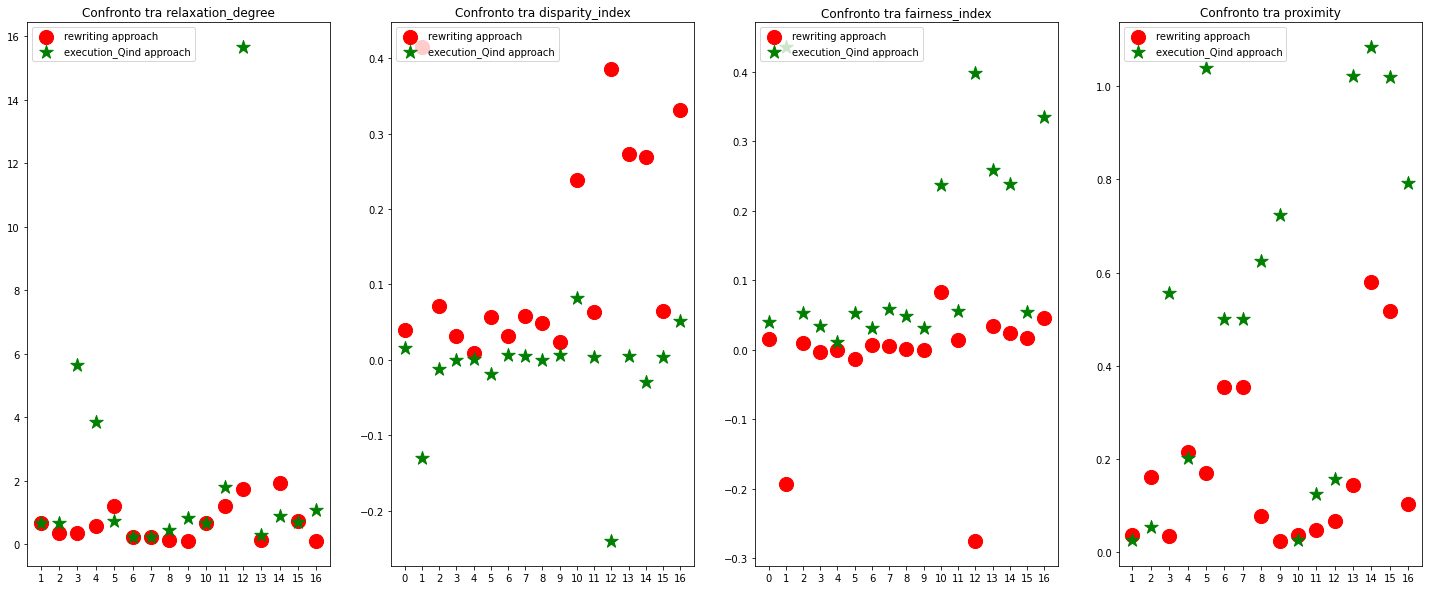

In [ ]:
plt.subplot(1,4,1)
plt.scatter(rewriting_df['id'],rewriting_df['relaxation_degree'],color='red',label ='rewriting approach',s=200)
plt.scatter(execution_Qind_df['id'],execution_Qind_df['relaxation_degree_Qind'],color='green',label='execution_Qind approach',s=200,marker='*')
plt.xticks(execution_res_df['id'])
plt.title("Confronto tra relaxation_degree")
plt.legend(loc = 'upper left')
plt.plot()
plt.subplot(1,4,2)
plt.scatter(range(len(test2_exec_qind)),manage_column_with_long_value_two(rewriting_df['disparity_index']),color='red',label ='rewriting approach',s=200)
plt.scatter(range(len(test2_exec_qind)),manage_column_with_long_value_two(execution_Qind_df['disparity_index_Qind']),color='green',label='execution_Qind approach',s=200,marker='*')
plt.title("Confronto tra disparity_index")
plt.xticks(range(len(test2_exec_qind)))
plt.legend(loc = 'upper left')
plt.plot()
plt.subplot(1,4,3)
plt.scatter(range(len(test2_exec_qind)),manage_column_with_long_value_two(rewriting_df['fairness_index']),color='red',label ='rewriting approach',s=200)
plt.scatter(range(len(test2_exec_qind)),manage_column_with_long_value_two(execution_Qind_df['fairness_index_Qind']),color='green',label='execution_Qind approach',s=200,marker='*')
plt.title("Confronto tra fairness_index")
plt.xticks(range(len(test2_exec_qind)))
plt.legend(loc = 'upper left')
plt.plot()
plt.subplot(1,4,4)
plt.scatter(rewriting_df['id'],rewriting_df['proximity_qcut'],color='red',label ='rewriting approach',s=200)
plt.scatter(execution_Qind_df['id'],execution_Qind_df['proximity_Qind'],color='green',label='execution_Qind approach',s=200,marker='*')
plt.xticks(execution_res_df['id'])
plt.title("Confronto tra proximity")
plt.legend(loc = 'upper left')
plt.plot()

In [ ]:
proximity_comp = np.where(rewriting_df['proximity_qcut']<execution_Qind_df['proximity_Qind'],True,False)
proximity_comp

array([False, False,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True])

The lower the proximity, the closer the AOR to the input
query, from a syntactic point of view.
Perciò vediamo che il metodo rewriting riscrive le query in modo più simile alla query iniziale. 

In [ ]:
result = pd.merge(rewriting_df, execution_res_df, on="id")


In [ ]:
result

,id,query_x,path_x,Coverage Constraint_x,card_true_tot_Q_x,card_true_sa_Q_x,card_true_tot_newQ_x,card_true_sa_newQ_x,proximity_qcut,relaxation_degree_x,disparity_index_x,fairness_index_x,qcut_average_time_preprocessing,qcut_average_time_pruning,qcut_average_time_algo,qcut_mean_summed_time,query_y,path_y,Coverage Constraint_y,card_true_tot_Q_y,card_true_sa_Q_y,card_true_tot_newQ_y,card_true_sa_newQ_y,relaxation_degree_y,disparity_index_y,fairness_index_y,average_time_read_table,average_time_norm_data_and_comp_q,average_time_norm_data,average_time_q_comp,average_time_norm_point,average_time_tree_exec,average_time_execution
0,1,SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 40,C:\Users\Nicolò\Desktop\Tesi\res2 - rewrinting\rewriting_sample_Q1.csv,100,2026,[50],3409,[134],0.036262,0.682626,[0.0393077148723966],[0.01561238680965479],0.004273,0.038841,0.018018,0.061132,SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 40,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q1_norm.csv,"[{'AS': ['race'], 'value': ['Black'], 'num': '100'}]",2026,[50],2076,[100],0.024679,[0.04816955684007707],[0.025303643724696356],0.199104,0.03645443916320801,0.017531371116638182,0.000006,0.000014,0.004542779922485351,0.050508
1,2,SELECT * FROM adult_data WHERE education_num >= 14 AND age < 30 AND hours_per_week <= 45,C:\Users\Nicolò\Desktop\Tesi\res2 - rewrinting\rewriting_sample_Q2.csv,120,234,[111],318,[132],0.160375,0.358974,[0.41509433962264153],[-0.19276160503540518],0.006700,0.064018,0.047800,0.118518,SELECT * FROM adult_data WHERE education_num >= 14 AND age < 30 AND hours_per_week <= 45,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q2_norm.csv,"[{'AS': ['sex'], 'value': ['Female'], 'num': '120'}]",234,[111],243,[120],0.038462,[0.49382716049382713],[0.07317073170731703],0.191635,0.1166724443435669,0.09062497615814209,0.000006,0.000016,0.017288351058959962,0.142554
2,3,SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 55 AND hours_per_week < 35,C:\Users\Nicolò\Desktop\Tesi\res2 - rewrinting\rewriting_sample_Q3.csv,500,6360,[401],8514,[608],0.035070,0.338679,[0.0714117923420249],[0.009610447510726289],0.006157,0.081321,0.355778,0.443255,SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 55 AND hours_per_week < 35,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q3_norm.csv,"[{'AS': ['sex', 'race'], 'value': ['Female', 'Black'], 'num': '500'}]",6360,[401],6459,[500],0.015566,[0.07741136398823348],[0.016613525759355596],0.193152,0.03059844970703125,0.010845088958740234,0.000007,0.000017,0.002292966842651367,0.046195
3,4,SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 55 AND hours_per_week < 35,C:\Users\Nicolò\Desktop\Tesi\res2 - rewrinting\rewriting_sample_Q4.csv,300,6360,"[217, 62]",9956,"[311, 97]",0.214580,0.565409,"[0.031237444756930494, 0.009742868621936521]","[-0.003080073523312153, -5.669008922922977e-06]",0.006262,0.109850,1.576771,1.692883,SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 55 AND hours_per_week < 35,C:\Users\Nicolò\Desktop\Tesi\res2 - execution\execution_Q4_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '300'}, {'AS': ['race'], 'value': ['Amer-Indian-Eskimo'], 'num': '100'}]",6360,"[217, 62]",6481,"[300, 100]",0.019025,"[0.046289152908501774, 0.015429717636167259]","[0.013211075735998452, 0.005827129793320507]",0.198267,"[0.025095486640930177, 0.020028448104858397]","[0.007382416725158691, 0.002557039260864258]",0.000006,0.000017,"[0.0012461423873901367, 0.00037550926208496094]",0.062117
4,5,SELECT * FROM adult_data WHERE age <= 40 AND education_num >= 13 AND hours_per_week > 30 AND capital_gain > 500,C:\Users\Nicolò\Desktop\Tesi\res2 - rewrinting\rewriting_sample_Q5.csv,80,623,[43],1368,[78],0.170000,1.195827,[0.05701754385964912],[-0.013672814755412988],0.008297,0.062841,1.596899,1.668037,SELECT * FROM adult_data WHERE age <= 40 AND education_num >= 13 AND hours_per_week > 30 AND capital_ga

In [ ]:
lst = np.where(result['relaxation_degree_x']>=result['relaxation_degree_y'],True , False)
lst

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
test = np.where(result['card_true_tot_newQ_x']>result['card_true_tot_newQ_y'], True, False)
test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
pd.set_option("max_colwidth", None)
result['query_x']

0                                          SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 40
1                            SELECT * FROM adult_data WHERE education_num >= 14 AND age < 30 AND hours_per_week <= 45
2                             SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 55 AND hours_per_week < 35
3                             SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 55 AND hours_per_week < 35
4     SELECT * FROM adult_data WHERE age <= 40 AND education_num >= 13 AND hours_per_week > 30 AND capital_gain > 500
5                                          SELECT * FROM adult_data WHERE education_num < 12 AND hours_per_week <= 40
6                                          SELECT * FROM adult_data WHERE education_num < 12 AND hours_per_week <= 40
7                             SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 50 AND hours_per_week > 30
8      SELECT * FROM adult_data WHERE age <= 40 AND educ

In [ ]:
test = np.where(result['qcut_mean_summed_time']>result['average_time_execution'], True, False)
test

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True])

In [ ]:
test1 = np.where(manage_column_with_long_value_two(result['fairness_index_x'])>manage_column_with_long_value_two(result['fairness_index_y']),True,False)
test1

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False])

Relaxation degree. Similarly to [24], the relaxation degree, first proposed in [4], quantifies
how much 𝑄𝑜𝑝𝑡
𝑆,𝐶𝐶 relaxes the input query 𝑄, as the percentage of new tuples returned by
𝑄𝑜𝑝𝑡
𝑆,𝐶𝐶 with respect to those contained in the input query result. The lower the relaxation
degree, the lower is the applied relaxation.
• Proximity. It can be defined as the Euclidean distance between 𝑄𝑜𝑝𝑡
𝑆,𝐶𝐶 and 𝑄 in the unit space,
further normalized between 0 and 1. The lower the proximity, the closer the AOR to the input
query, from a syntactic point of view.
• Fairness index. For each coverage constraint 𝐶, this measure computes the difference in the
distribution of protected and unprotected groups in the result of the input query and the
rewritten one. Information about the distribution can be obtained by computing the fairness
rate 𝑓 () of the instances satisfying the constraints and those do not satisfying it. Statistical
parity is achieved by a query result for fairness rate values close to 1. Values of the fairness
index are between 1 and -1: values close to 1 means that the AOR improves statistical parity.